In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
housing_price_df = pd.read_csv('housing_price_dataset.csv')
housing_price_df.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


In [3]:
housing_price_df.shape

(50000, 6)

In [4]:
housing_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


In [5]:
missing_column = housing_price_df.isnull().sum()
missing_column = missing_column[missing_column > 0]
missing_column

Series([], dtype: int64)

In [6]:
housing_price_df[housing_price_df.duplicated()]

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price


In [7]:
housing_price_df.columns

Index(['SquareFeet', 'Bedrooms', 'Bathrooms', 'Neighborhood', 'YearBuilt',
       'Price'],
      dtype='object')

In [8]:
housing_price_df.describe().T

,count,mean,std,min,25%,50%,75%,max
SquareFeet,50000.0,2006.374680,575.513241,1000.000000,1513.000000,2007.000000,2506.000000,2999.000000
Bedrooms,50000.0,3.498700,1.116326,2.000000,3.000000,3.000000,4.000000,5.000000
Bathrooms,50000.0,1.995420,0.815851,1.000000,1.000000,2.000000,3.000000,3.000000
YearBuilt,50000.0,1985.404420,20.719377,1950.000000,1967.000000,1985.000000,2003.000000,2021.000000
Price,50000.0,224827.325151,76141.842966,-36588.165397,169955.860225,225052.141166,279373.630052,492195.259972


In [9]:
housing_price_df[housing_price_df['Price'] <= 0]

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
1266,1024,2,2,Urban,2006,-24715.242482
2310,1036,4,1,Suburb,1983,-7550.504574
3630,1235,3,2,Rural,2012,-19871.251146
4162,1352,5,2,Suburb,1977,-10608.359522
5118,1140,4,1,Urban,2020,-23911.003119
5951,1097,4,3,Rural,1981,-4537.418615
6355,1016,5,2,Rural,1997,-13803.684059
8720,1235,3,1,Urban,1952,-24183.000515
9611,1131,3,3,Urban,1959,-13692.026068
10597,1177,2,3,Urban,2010,-434.097124


In [10]:
housing_price_df = housing_price_df[housing_price_df['Price'] >= 0]
housing_price_df.shape

(49978, 6)

In [11]:
housing_price_df['Neighborhood'].value_counts()

Neighborhood
Suburb    16716
Rural     16668
Urban     16594
Name: count, dtype: int64

/Users/oluwatobilobafafowora/anaconda3/envs/lab_environment3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/oluwatobilobafafowora/anaconda3/envs/lab_environment3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/oluwatobilobafafowora/anaconda3/envs/lab_environment3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/oluwatobilobafafowora/anaconda3/envs/lab_environment3/lib/python3.9/site-pack

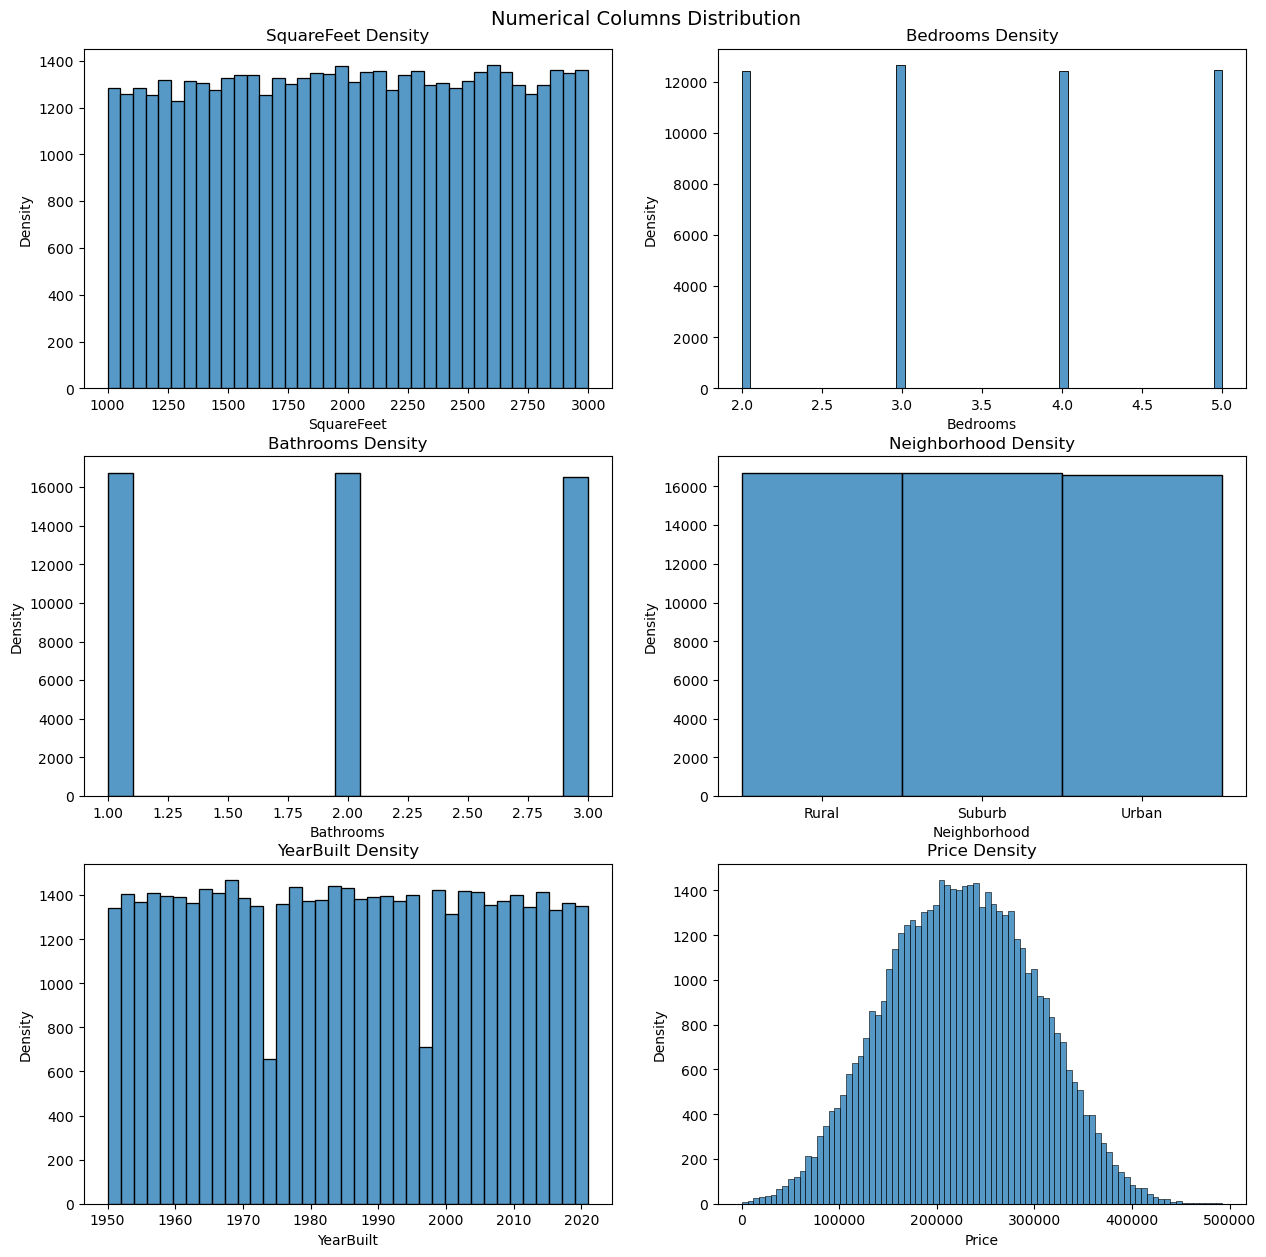

In [12]:
num_rows = len(housing_price_df.columns) // 2 + len(housing_price_df.columns) % 2

fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows))

for i, col in enumerate(housing_price_df.columns.to_numpy()):
    r = i // 2
    c = i % 2
    sns.histplot(x=col, data=housing_price_df, ax=axes[r,c])
    axes[i//2,i%2].set_ylabel("Density")
    axes[i//2,i%2].set_title(f"{col} Density")

if len(housing_price_df.columns.to_numpy()) % 2 != 0:
    fig.delaxes(axes[-1, -1])
fig.text(0.5,0.9,"Numerical Columns Distribution",va="center", ha="center", fontsize=14)
plt.show()

/Users/oluwatobilobafafowora/anaconda3/envs/lab_environment3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/oluwatobilobafafowora/anaconda3/envs/lab_environment3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/oluwatobilobafafowora/anaconda3/envs/lab_environment3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/oluwatobilobafafowora/anaconda3/envs/lab_environment3/lib/python3.9/site-packages/seabo

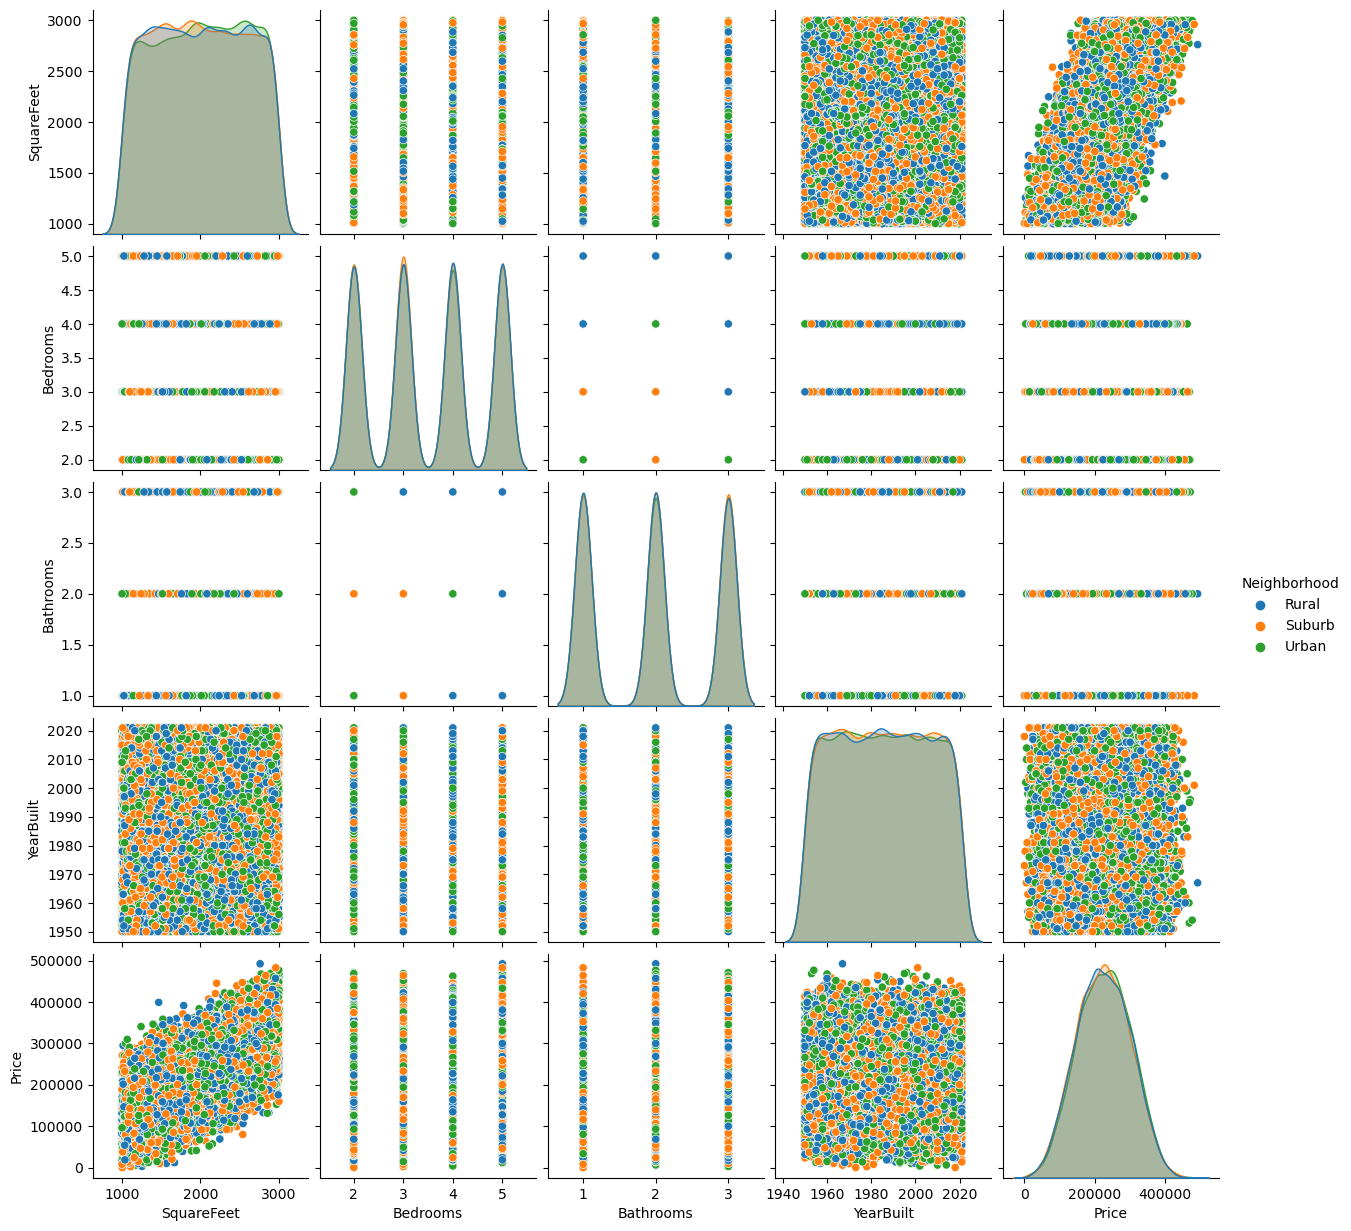

In [13]:
sns.pairplot(housing_price_df,
             vars=["SquareFeet","Bedrooms","Bathrooms","YearBuilt",'Price'],
            hue='Neighborhood')
plt.show()

In [14]:
housing_price_df = pd.get_dummies(housing_price_df)
housing_price_df.head()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price,Neighborhood_Rural,Neighborhood_Suburb,Neighborhood_Urban
0,2126,4,1,1969,215355.283618,True,False,False
1,2459,3,2,1980,195014.221626,True,False,False
2,1860,2,1,1970,306891.012076,False,True,False
3,2294,2,1,1996,206786.787153,False,False,True
4,2130,5,2,2001,272436.239065,False,True,False


In [18]:
bool_columns = housing_price_df.select_dtypes(include=['bool']).columns.to_numpy()
housing_price_df[bool_columns] = housing_price_df[bool_columns].astype(int)

housing_price_df.head()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price,Neighborhood_Rural,Neighborhood_Suburb,Neighborhood_Urban
0,2126,4,1,1969,215355.283618,1,0,0
1,2459,3,2,1980,195014.221626,1,0,0
2,1860,2,1,1970,306891.012076,0,1,0
3,2294,2,1,1996,206786.787153,0,0,1
4,2130,5,2,2001,272436.239065,0,1,0
